In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## Análise sobre a Sindrome Metabólica: 
Nesse dataset contém informações sobre indivíduos com a Síndrome Metabólica, designa-se por síndrome metabólica a coexistência, num mesmo paciente, de um perímetro de cintura aumentado (superior a 94 centímetros para os homens, e superior a 80 centímetros para as mulheres) e de duas situações patológicas seguintes: alteração da glicemia de jejum ou diabetes, hipertensão arterial e dislipidemia (triglicerídeos e ou HDL alterados).

Os doentes com a síndrome metabólica têm um risco 3,5 vezes maior de morte por doenças cardiovasculares, como enfarte do miocárdio e AVC. 

### Descrição das colunas: 
 * seqn: Número de Identificação sequencial.
 * Idade: Idade do indivíduo.
 * Sexo: Gênero do indivíduo, aqui utilizado M para masculino e F para feminino. 
 * Conjugal: Estado civil do indivíduo. 
 * Renda: Nível de renda, ou informações relacionadas a rendas. 
 * Raça: Origem étnica ou racial de cada indivíduo. 
 * CinturaCirc: Medição da circufência da cintura, em cm. 
 * IMC: Índice de Massa Corporal. 
 * Albuminúria: Medição de albumina na urina. 
 * UrAlbCr: Relação de albumina/creatina urinária. 
 * UricAcid: Níveis de ácido úrico no sangue.
 * Glicose no sangue: Níveis de glicose no sangue, um indicador de risco de diabetes.
 * HDL: Níveis de colesterol de lipoproteína de alta densidade (o colesterol “bom”).
* Triglicerídeos: Níveis de triglicerídeos no sangue.
* Síndrome Metabólica: Variável binária que indica (1) presença ou (0) ausência de síndrome metabólica.

In [2]:
#csv original, em inglês
df_original = pd.read_csv('Metabolic_Syndrome.csv')
df_original.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [3]:
#abri as infos para saber os tipos
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
#traduzir de inglês para português: 
dict_tradutor = {
    'seqn': 'seqn',
    'Age' : 'Idade', 
    'Sex' : 'Sexo', 
    'Marital' : 'Conjugual', 
    'Income' : 'Renda', 
    'Race' : 'Raça', 
    'WaistCirc' : 'CircCintura',
    'BMI' : 'IMC',
    'Albuminuria' : 'Albuminúria', 
    'UrAlbCr' : 'UrAlbCr',
    'UricAcid' : 'AcidUric',
    'BloodGlucose' : 'GlicoseSangue',
    'HDL' : 'HDL',
    'Triglycerides' : 'Triglicerídeos',
    'MetabolicSyndrome' : 'SindromeMetabólica' # 1 tem a SM, 0 não tem a presença. 
    
}

colunas_portugues = []

for chave, valor in dict_tradutor.items():
    colunas_portugues.append(valor)

colunas_portugues

['seqn',
 'Idade',
 'Sexo',
 'Conjugual',
 'Renda',
 'Raça',
 'CircCintura',
 'IMC',
 'Albuminúria',
 'UrAlbCr',
 'AcidUric',
 'GlicoseSangue',
 'HDL',
 'Triglicerídeos',
 'SindromeMetabólica']

In [5]:
#substituir o df inglês para o português
df = df_original
df.columns = colunas_portugues
df.head()

,seqn,Idade,Sexo,Conjugual,Renda,Raça,CircCintura,IMC,Albuminúria,UrAlbCr,AcidUric,GlicoseSangue,HDL,Triglicerídeos,SindromeMetabólica
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [6]:
#onde há nulos
df.isnull().sum()

seqn                    0
Idade                   0
Sexo                    0
Conjugual             208
Renda                 117
Raça                    0
CircCintura            85
IMC                    26
Albuminúria             0
UrAlbCr                 0
AcidUric                0
GlicoseSangue           0
HDL                     0
Triglicerídeos          0
SindromeMetabólica      0
dtype: int64

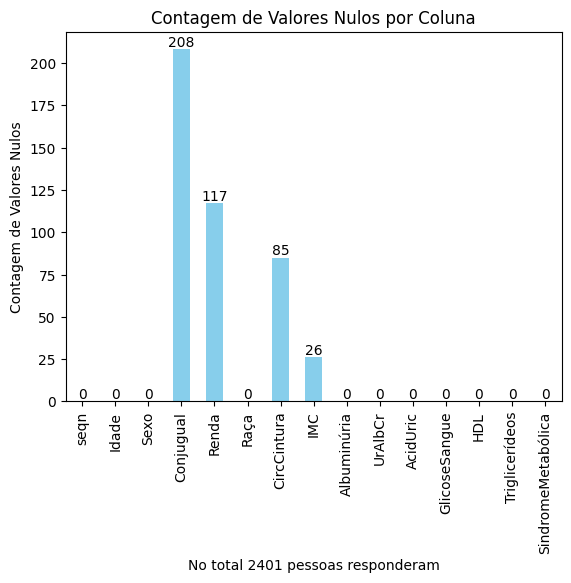

In [7]:
#gráfico de nulos
ax1 = df.isnull().sum().plot(kind='bar', color='skyblue')


plt.title('Contagem de Valores Nulos por Coluna')
plt.xlabel('No total 2401 pessoas responderam')
plt.ylabel('Contagem de Valores Nulos') 

for i, value in enumerate(df.isnull().sum()):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

/var/folders/gf/lsq9hnm95pz3qsglh7wjfls80000gn/T/ipykernel_28218/220792913.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, contagem_sexo[i], contagem_sexo[i], ha='center', va='bottom')


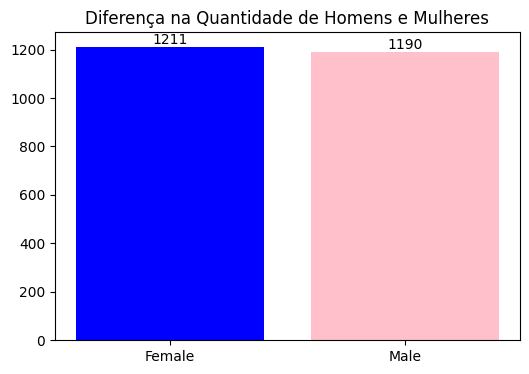

In [8]:
#Contagem de homens e mulheres
contagem_sexo = df['Sexo'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(contagem_sexo.index, contagem_sexo.values, color=['blue', 'pink'])
plt.title("Diferença na Quantidade de Homens e Mulheres")

for i in range(len(contagem_sexo)):
    plt.text(i, contagem_sexo[i], contagem_sexo[i], ha='center', va='bottom')

plt.show()

In [9]:
#contagem para quem tem e não tem
contagem_SM = df['SindromeMetabólica'].value_counts()
contagem_SM

SindromeMetabólica
0    1579
1     822
Name: count, dtype: int64

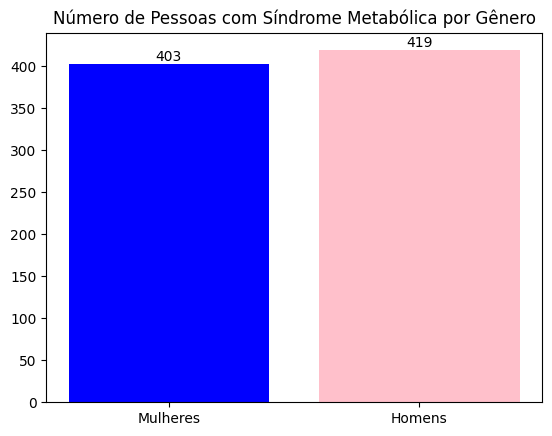

In [10]:
#contagem por gênero
mulheres_com_SM = df[(df['Sexo'] == 'Female') & (df['SindromeMetabólica'] == 1)]
homens_com_SM = df[(df['Sexo'] == 'Male') & (df['SindromeMetabólica'] == 1)]

contagem_mulheres = mulheres_com_SM.shape[0]
contagem_homens = homens_com_SM.shape[0]

categorias = ['Mulheres', 'Homens']
contagens = [contagem_mulheres, contagem_homens]

plt.bar(categorias, contagens, color=['blue', 'pink'])
plt.title("Número de Pessoas com Síndrome Metabólica por Gênero")

for i in range(len(categorias)):
    plt.text(i, contagens[i], contagens[i], ha='center', va='bottom')

plt.show()

In [11]:
#idades, desses homens e mulheres
agrupado = df[df['SindromeMetabólica'] == 1].groupby('Idade').size().reset_index(name='Contagem')
agrupado

,Idade,Contagem
0,20,7
1,21,4
2,22,5
3,23,6
4,24,8
...,...,...
56,76,12
57,77,10
58,78,13
59,79,5


In [12]:
# 5 maiores idades
agrupado_ordenado = agrupado.sort_values(by='Contagem', ascending=False)

cinco_maiores_contagens = agrupado_ordenado.head(5)

print(cinco_maiores_contagens)


    Idade  Contagem
60     80        53
43     63        31
40     60        30
50     70        27
34     54        24


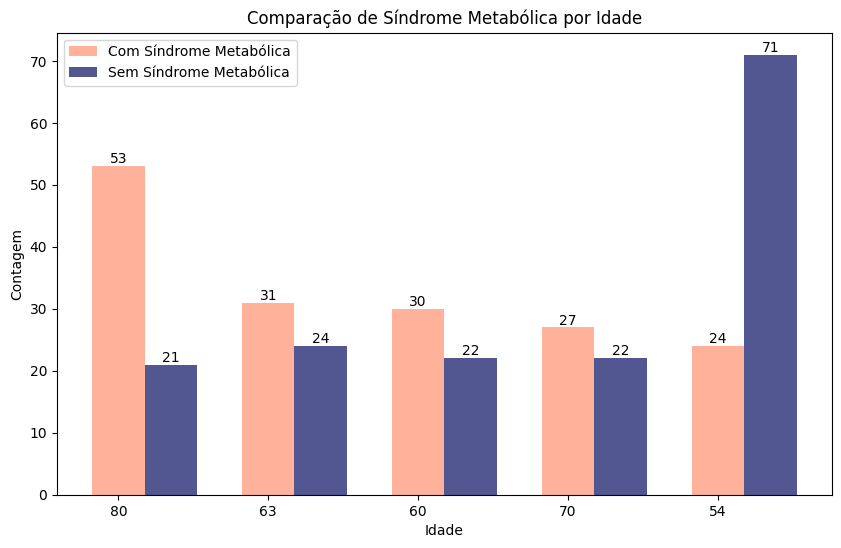

In [13]:
#gráfico da 5 maiores idade, e comparando com pessoas que não tem. 
cinco_maiores_contagens
idades_sem_sindrome = df[df['SindromeMetabólica'] == 0]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
ax.bar(range(len(cinco_maiores_contagens)), cinco_maiores_contagens['Contagem'], width=bar_width, label='Com Síndrome Metabólica', color='#FFB299')

#isso aqui é para mostrar exatamente a idades ali das cinco_maiores_contagens.
ax.set_xticks(range(len(cinco_maiores_contagens)))
ax.set_xticklabels(cinco_maiores_contagens['Idade'])

contagens_sem_sindrome = idades_sem_sindrome[idades_sem_sindrome['Idade'].isin(cinco_maiores_contagens['Idade'])].groupby('Idade').size().reset_index(name='Contagem')

ax.bar([x + bar_width for x in range(len(contagens_sem_sindrome))], contagens_sem_sindrome['Contagem'], width=bar_width, label='Sem Síndrome Metabólica', color='#525691')

for i in range(len(cinco_maiores_contagens)):
    plt.text(i, cinco_maiores_contagens.iloc[i, 1], str(cinco_maiores_contagens.iloc[i, 1]), ha='center', va='bottom')
    plt.text(i + bar_width, contagens_sem_sindrome.iloc[i, 1], str(contagens_sem_sindrome.iloc[i, 1]), ha='center', va='bottom')

ax.set_xlabel('Idade')
ax.set_ylabel('Contagem')
ax.set_title('Comparação de Síndrome Metabólica por Idade')
ax.legend()

plt.show()


# INSIGHTS: 
Após analisar o dataset sobre a Síndrome Metabólica (SM), pude notar algumas coisas: <br>
1. No total 2401 pessoas foram entrevistadas. <br>
2. A maior parte das respostas foram de mulheres, com o total de 1211. <br>
3. Foram encontradas 822 pessoas com a SM. <br>
4. A SM mostrou-se mais nos homens, com um total de 419. <br> 
5. Vê-se também que a SM se encontra em pessoas de idade mais avançada, +60, pois com essa idade vem:  <br>
   - Redução da Atividade Física:
   Com o envelhecimento, a tendência é que as pessoas se tornem menos ativas, levando ao ganho de peso e ao acúmulo de gordura abdominal, um critério da Síndrome Metabólica.
   - Alterações Hormonais:
   O envelhecimento está associado a alterações hormonais, como a diminuição da sensibilidade à insulina, o que contribui para níveis elevados de glicose no sangue e resistência à insulina.
   - Mudanças no Metabolismo:
   O metabolismo desacelera com a idade, tornando mais desafiada a manutenção de um peso saudável e o controle dos níveis de colesterol e triglicerídeos.
